In [1]:
# import all necessary packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import missingno as msno
import statistics
import seaborn
from scipy.stats import chi2_contingency

In [2]:
# Pulling in the data [In text citation: Bowne-Anderson, H. (n.d)]
churned_data_cleaned = pd.read_csv("C:/Users/cfman/OneDrive/Desktop/WGUClasses/D207 Exploratory Data Analysis/churn_clean.csv")

In [3]:
## I'm going to drop any categorical variables that have a cardinality greater than 8. Those columns are: 
## 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', and 'Job'
## I've decided to keep 'Customer_ID' as I think it would be beneificial to still have an identifier
## I set the limit to 8 because the survey responses have 8 options and I wanted to keep them
## Also going to drop all quantitative variables as I'm just going to look at the categorical variables for relationships

churned_data = churned_data_cleaned.drop(columns = ['Customer_id','Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job',
                                                   'Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Population', 'Age', 
                                                   'Children', 'Email', 'Contacts', 'Yearly_equip_failure'])

In [4]:
#churned_data.info()
#churned_data.isna().sum()
print(churned_data.shape)

(10000, 28)


In [5]:
# Get the list of all column names from headers of data with just categorical variables
# In Text Citation: Board Infinity. (n.d). How to Get Column Names in Pandas. ,using%20the%20print()%20statement.
column_headers = list(churned_data.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['CaseOrder', 'Area', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


In [6]:
## Checking how many unique values there are for each categorical variable
for i in range(len(column_headers)):
    print("Unique values for ", column_headers[i], ":", churned_data[column_headers[i]].nunique())

Unique values for  CaseOrder : 10000
Unique values for  Area : 3
Unique values for  Marital : 5
Unique values for  Gender : 3
Unique values for  Churn : 2
Unique values for  Techie : 2
Unique values for  Contract : 3
Unique values for  Port_modem : 2
Unique values for  Tablet : 2
Unique values for  InternetService : 3
Unique values for  Phone : 2
Unique values for  Multiple : 2
Unique values for  OnlineSecurity : 2
Unique values for  OnlineBackup : 2
Unique values for  DeviceProtection : 2
Unique values for  TechSupport : 2
Unique values for  StreamingTV : 2
Unique values for  StreamingMovies : 2
Unique values for  PaperlessBilling : 2
Unique values for  PaymentMethod : 4
Unique values for  Item1 : 7
Unique values for  Item2 : 7
Unique values for  Item3 : 8
Unique values for  Item4 : 7
Unique values for  Item5 : 7
Unique values for  Item6 : 8
Unique values for  Item7 : 7
Unique values for  Item8 : 8


In [7]:
## Analyzing the chi-square significance
## In Text Citation: Python For Data Science. (n.d). Chi-square
## Creating a for loop for the testing of every categorical variable against Churn

alpha = 0.05
no_post_hoc = []
post_hoc = []

for i in range(1, len(column_headers)):
    if churned_data[column_headers[i]].nunique() == 2:
        no_post_hoc.append(column_headers[i])
        if column_headers[i] == "Churn":
            print("Can't compare Churn to itself \n")
            
        else:
            chisqt = pd.crosstab(churned_data["Churn"], churned_data[column_headers[i]])
            stat, p, dof, expected = chi2_contingency(chisqt)
            print("Chi-Squared results for ", column_headers[i], ":")
            print("The ChiSquare statistic is: ", str(stat))
            print("The p-value is ", str(p))
            print("The degrees of freedom: ", str(dof))
            
            if p < alpha:
                print("Dependent (reject H0) \n")
                
            else:
                print("Independent (H0 holds true) \n")
    else:
        post_hoc.append(column_headers[i])
        print(column_headers[i], "has more than two unique values. Post hoc testing required")
        print("Unique values :", churned_data[column_headers[i]].unique(), "\n")
                

Area has more than two unique values. Post hoc testing required
Unique values : ['Urban' 'Suburban' 'Rural'] 

Marital has more than two unique values. Post hoc testing required
Unique values : ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced'] 

Gender has more than two unique values. Post hoc testing required
Unique values : ['Male' 'Female' 'Nonbinary'] 

Can't compare Churn to itself 

Chi-Squared results for  Techie :
The ChiSquare statistic is:  44.11479393861451
The p-value is  3.096716355509661e-11
The degrees of freedom:  1
Dependent (reject H0) 

Contract has more than two unique values. Post hoc testing required
Unique values : ['One year' 'Month-to-month' 'Two Year'] 

Chi-Squared results for  Port_modem :
The ChiSquare statistic is:  0.6289054496407676
The p-value is  0.42775708657217937
The degrees of freedom:  1
Independent (H0 holds true) 

Chi-Squared results for  Tablet :
The ChiSquare statistic is:  0.06407455372880874
The p-value is  0.800168128126761
The 

In [8]:
# Converting the values in the Item1-8 variables to a string so they can be compared to the other categorical variable types

churned_data["Item1"] = churned_data["Item1"].astype(str)
churned_data["Item2"] = churned_data["Item2"].astype(str)
churned_data["Item3"] = churned_data["Item3"].astype(str)
churned_data["Item4"] = churned_data["Item4"].astype(str)
churned_data["Item5"] = churned_data["Item5"].astype(str)
churned_data["Item6"] = churned_data["Item6"].astype(str)
churned_data["Item7"] = churned_data["Item7"].astype(str)
churned_data["Item8"] = churned_data["Item8"].astype(str)

In [9]:
## In Text Citation: Python For Data Science. (n.d). Chi-square
## Creating dummy variables to test every response type versus churn. Have to do this for any variable with more than 2 
## unique respones

for i in range(0, len(post_hoc)):
    dummies = pd.get_dummies(churned_data[post_hoc[i]])

    for series in dummies:
        nl = "\n"

        crosstab = pd.crosstab(dummies[f"{series}"], churned_data["Churn"])
        print(crosstab, nl)
        chi2, p, dof, expected = chi2_contingency(crosstab)
        print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

Churn    No   Yes
Rural            
0      4886  1787
1      2464   863 

Chi2 value= 0.7622288239720689
p-value= 0.3826319167192428
Degrees of freedom= 1

Churn       No   Yes
Suburban            
0         4877  1777
1         2473   873 

Chi2 value= 0.40118773268271757
p-value= 0.5264764989502466
Degrees of freedom= 1

Churn    No   Yes
Urban            
0      4937  1736
1      2413   914 

Chi2 value= 2.345175603850992
p-value= 0.12567139926718623
Degrees of freedom= 1

Churn       No   Yes
Divorced            
0         5811  2097
1         1539   553 

Chi2 value= 0.0024032767802002284
p-value= 0.960900785764893
Degrees of freedom= 1

Churn      No   Yes
Married            
0        5932  2157
1        1418   493 

Chi2 value= 0.5539876530363426
p-value= 0.4566929034372921
Degrees of freedom= 1

Churn            No   Yes
Never Married            
0              5882  2162
1              1468   488 

Chi2 value= 2.9055176114283876
p-value= 0.08827691007784891
Degrees of freedom=

Churn    No   Yes
2                
0      6309  2264
1      1041   386 

Chi2 value= 0.2264089498799671
p-value= 0.634199417556615
Degrees of freedom= 1

Churn    No   Yes
3                
0      4793  1762
1      2557   888 

Chi2 value= 1.3563569888095832
p-value= 0.2441698463785797
Degrees of freedom= 1

Churn    No   Yes
4                
0      4914  1753
1      2436   897 

Chi2 value= 0.4059387240717919
p-value= 0.5240380797862452
Degrees of freedom= 1

Churn    No   Yes
5                
0      6326  2292
1      1024   358 

Chi2 value= 0.2575794680860711
p-value= 0.6117879906242191
Degrees of freedom= 1

Churn    No   Yes
6                
0      7204  2586
1       146    64 

Chi2 value= 1.5388777270464438
p-value= 0.21478493055954892
Degrees of freedom= 1

Churn    No   Yes
7                
0      7341  2647
1         9     3 

Chi2 value= 0.0
p-value= 1.0
Degrees of freedom= 1

Churn    No   Yes
8                
0      7349  2650
1         1     0 

Chi2 value= 0.0
p-va

<function matplotlib.pyplot.show(close=None, block=None)>

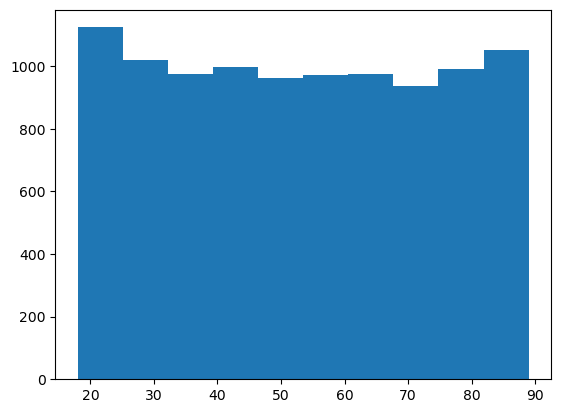

In [10]:
## Univariate Graphs for Age
plt.hist(churned_data_cleaned["Age"])
plt.show

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


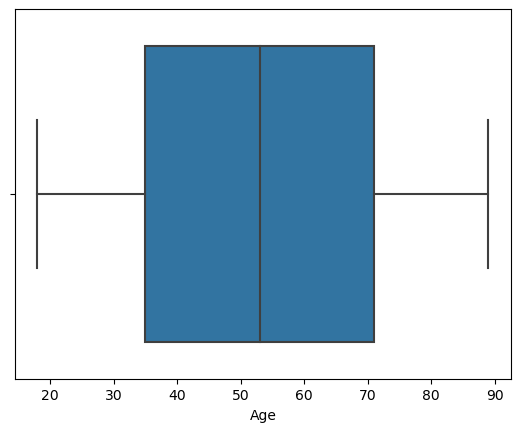

In [11]:
## Univariate Graphs for Age

boxplot_Age = seaborn.boxplot(x = "Age", data = churned_data_cleaned)
print(churned_data_cleaned["Age"].describe())

<function matplotlib.pyplot.show(close=None, block=None)>

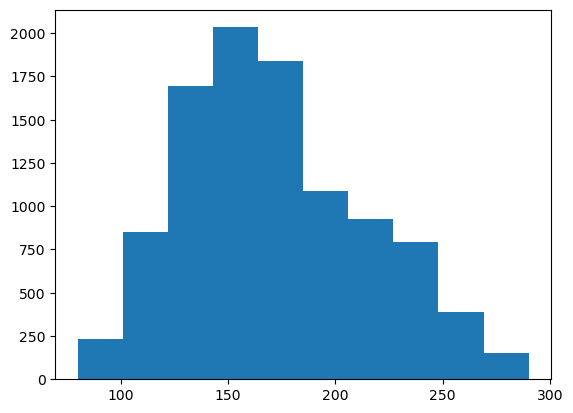

In [12]:
## Univariate Graphs for MonthlyCharge
plt.hist(churned_data_cleaned["MonthlyCharge"])
plt.show

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


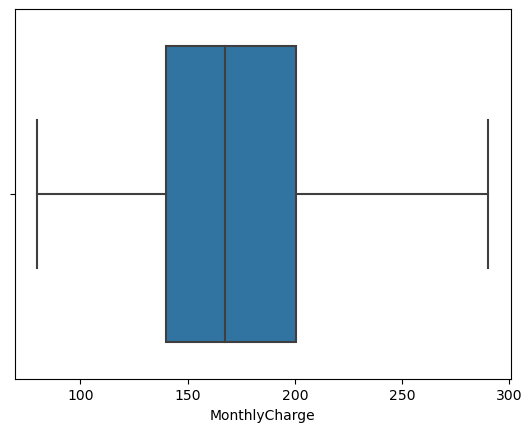

In [13]:
## Univariate Graphs for MonthlyCharge

boxplot_MonthlyCharge = seaborn.boxplot(x = "MonthlyCharge", data = churned_data_cleaned)
print(churned_data_cleaned["MonthlyCharge"].describe())

No     8321
Yes    1679
Name: Techie, dtype: int64


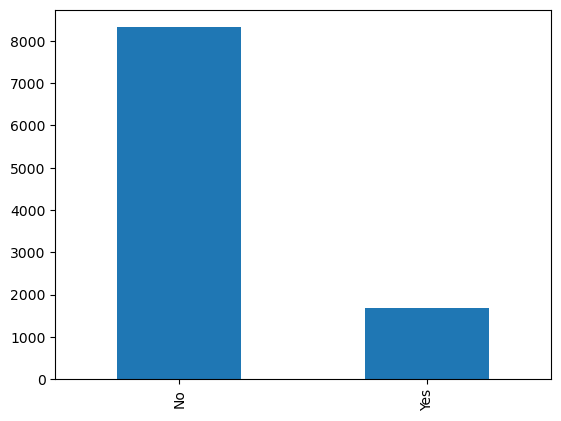

In [14]:
## Univariate Graphs for Techie
print(churned_data_cleaned["Techie"].value_counts())
techie = churned_data_cleaned["Techie"].value_counts().plot(kind = 'bar')

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64


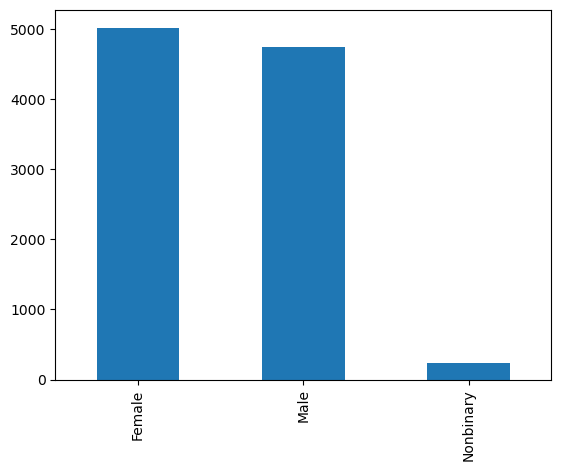

In [15]:
## Univariate Graphs for Gender
print(churned_data_cleaned["Gender"].value_counts())
Gender = churned_data_cleaned["Gender"].value_counts().plot(kind = 'bar')

<Axes: xlabel='Age', ylabel='MonthlyCharge'>

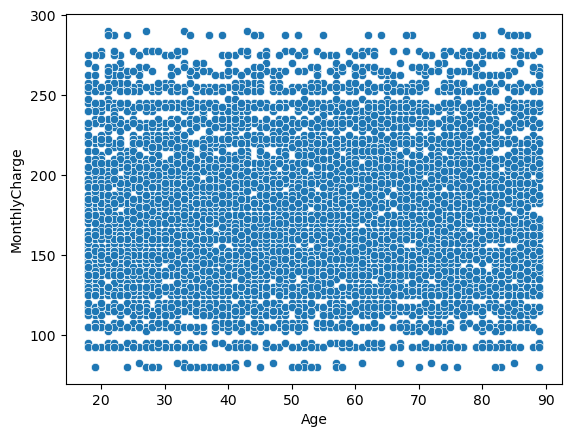

In [16]:
## Bivariate of Age and MonthlyCharge

seaborn.scatterplot(x = "Age", y = "MonthlyCharge",  data = churned_data_cleaned)

In [17]:
## Creating dataframe of just the two categorical variables I'm testing
churned_data_cat = churned_data_cleaned[["Techie", "Gender"]]

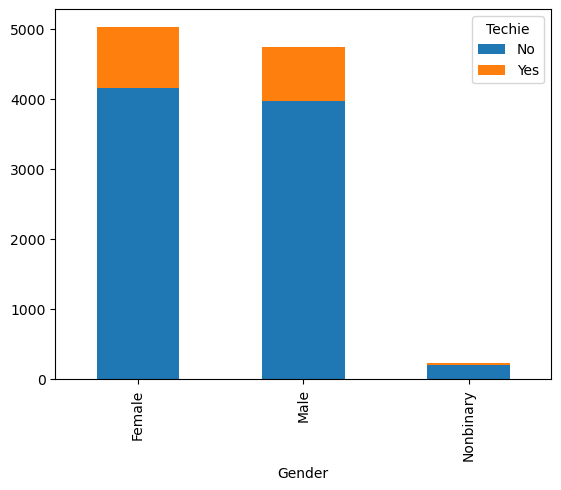

In [20]:
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart

cat_plot = pd.crosstab(churned_data_cat['Gender'], churned_data_cat['Techie']).plot(kind='bar', stacked=True)

In [19]:
## In text citation: Kosourova, E. (May 2023). How to Use SQL in pandas Using pandasql Queries.
## Getting the counts for each type of combination of variables

print(churned_data_cat[(churned_data_cat['Gender'] == 'Male') & (churned_data_cat['Techie'] == 'Yes')].value_counts())
print(churned_data_cat[(churned_data_cat['Gender'] == 'Male') & (churned_data_cat['Techie'] == 'No')].value_counts())
print(churned_data_cat[(churned_data_cat['Gender'] == 'Female') & (churned_data_cat['Techie'] == 'Yes')].value_counts())
print(churned_data_cat[(churned_data_cat['Gender'] == 'Female') & (churned_data_cat['Techie'] == 'No')].value_counts())
print(churned_data_cat[(churned_data_cat['Gender'] == 'Nonbinary') & (churned_data_cat['Techie'] == 'Yes')].value_counts())
print(churned_data_cat[(churned_data_cat['Gender'] == 'Nonbinary') & (churned_data_cat['Techie'] == 'No')].value_counts())

Techie  Gender
Yes     Male      778
dtype: int64
Techie  Gender
No      Male      3966
dtype: int64
Techie  Gender
Yes     Female    868
dtype: int64
Techie  Gender
No      Female    4157
dtype: int64
Techie  Gender   
Yes     Nonbinary    33
dtype: int64
Techie  Gender   
No      Nonbinary    198
dtype: int64
